In [1]:
# library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
# Read the City and Ride Data
city_df = pd.read_csv('city_data.csv')
ride_df = pd.read_csv('ride_data.csv')

In [3]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [6]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
# Combine the data into a dataframe
combined_df = pd.merge(ride_df, city_df, on='city', how='inner')
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
driver_count    2375 non-null int64
type            2375 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [9]:
combined_df.describe(include='all')

,city,date,fare,ride_id,driver_count,type
count,2375,2375,2375.000000,2.375000e+03,2375.000000,2375
unique,120,2375,NaN,NaN,NaN,3
top,West Angela,2018-03-24 02:53:43,NaN,NaN,NaN,Urban
freq,39,1,NaN,NaN,NaN,1625
mean,NaN,NaN,26.753112,4.887270e+12,28.930105,NaN
std,NaN,NaN,12.109465,2.907361e+12,20.666306,NaN
min,NaN,NaN,4.050000,3.218337e+08,1.000000,NaN
25%,NaN,NaN,17.190000,2.381175e+12,11.000000,NaN
50%,NaN,NaN,26.600000,4.748541e+12,23.000000,NaN
75%,NaN,NaN,36.645000,7.461936e+12,45.000000,NaN


### Bubble plot

In [10]:
# Obtain the x and y coordinates for each of the three city types
city_group = combined_df.groupby(['city'])
rides_per_city = city_group['ride_id'].count()
average_fares = city_group['fare'].mean()
drivers_per_city = city_group['driver_count'].mean()

# Make dataframe 
rides_and_fares_df = pd.DataFrame([rides_per_city, average_fares])
rides_and_fares_df = rides_and_fares_df.transpose()
rides_and_fares_df.head()

,ride_id,fare
city,,
Amandaburgh,18.0,24.641667
Barajasview,22.0,25.332273
Barronchester,16.0,36.422500
Bethanyland,18.0,32.956111
Bradshawfurt,10.0,40.064000


In [11]:
# Combine rides and fares data with city type
data = pd.merge(city_df, rides_and_fares_df, on='city')

# Change columns name
data = data.rename(
    columns={
        'ride_id':'Rides per City',
        'fare':'Average Fares',
        'driver_count': 'Drivers Count by City',
        'type':'Type'})
data.head()

,city,Drivers Count by City,Type,Rides per City,Average Fares
0,Richardfort,38,Urban,28.0,22.373214
1,Williamsstad,59,Urban,23.0,24.362174
2,Port Angela,67,Urban,19.0,23.836842
3,Rodneyfort,34,Urban,23.0,28.616957
4,West Robert,39,Urban,31.0,25.123871


In [12]:
# all type in combine_df
types = combined_df['type'].unique()
print(types)

['Urban' 'Suburban' 'Rural']


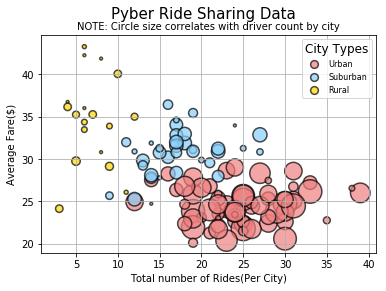

In [13]:
# Obtain the x and y coordinates for each of the three city types

urban_fare = data[(data['Type']=='Urban')]['Average Fares']
urban_rides = data[(data['Type']=='Urban')]['Rides per City']
urban_drivers = data[(data['Type']=='Urban')]['Drivers Count by City']

suburban_fare = data[(data['Type']=='Suburban')]['Average Fares']
suburban_rides = data[(data['Type']=='Suburban')]['Rides per City']
suburban_drivers = data[(data['Type']=='Suburban')]['Drivers Count by City']

rural_fare = data[(data['Type']=='Rural')]['Average Fares']
rural_rides = data[(data['Type']=='Rural')]['Rides per City']
rural_drivers = data[(data['Type']=='Rural')]['Drivers Count by City']


# Build the scatter plots for each city types

# Urban plot
plt.scatter(urban_rides, urban_fare, color="lightcoral", s=urban_drivers*8,
            alpha=0.7, linewidths = 1.5, edgecolors ='black', label="Urban")
# Suburban plot
plt.scatter(suburban_rides, suburban_fare, color="lightskyblue", s=suburban_drivers*8,
            edgecolors ='black', alpha=0.7, linewidths = 1.5, label="Suburban")
# Rural plot
plt.scatter(rural_rides,rural_fare,color="gold", s=rural_drivers*8,
            alpha=0.7, linewidths = 1.5, edgecolors='black', label="Rural")


# Incorporate the other graph properties
plt.xlabel("Total number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.suptitle("Pyber Ride Sharing Data", fontsize = 15)
plt.grid()


# Create a legend
lgnd = plt.legend(loc="best", title='City Types', title_fontsize=12, fontsize=8)
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]


# Title
plt.title("NOTE: Circle size correlates with driver count by city", fontsize = 10)


# Save Figure
# plt.savefig('bubble_plot.png')
plt.show()

### Pie plot

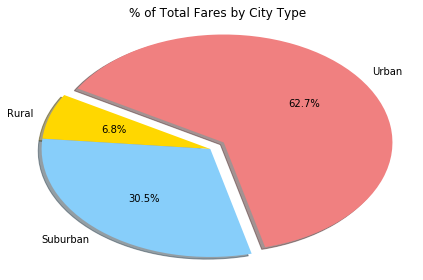

In [14]:
# Calculate Type Percents
fare_pie = combined_df.groupby('type')['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(fare_pie, explode = explode, labels = labels,
        colors=colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")
plt.axis("auto")
plt.tight_layout()

#plt.savefig('pie_fares.png')
plt.show()

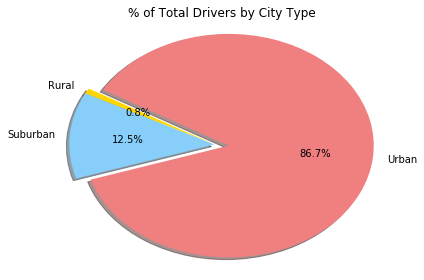

In [15]:
# Calculate Ride Percents
drivers_pie = combined_df.groupby('type')['driver_count'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(drivers_pie, explode = explode, labels = labels,
        colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.axis("auto")
plt.title("% of Total Drivers by City Type")
plt.tight_layout()

#plt.savefig('pie_drivers.png')
plt.show()

In [16]:
data.head()

,city,Drivers Count by City,Type,Rides per City,Average Fares
0,Richardfort,38,Urban,28.0,22.373214
1,Williamsstad,59,Urban,23.0,24.362174
2,Port Angela,67,Urban,19.0,23.836842
3,Rodneyfort,34,Urban,23.0,28.616957
4,West Robert,39,Urban,31.0,25.123871


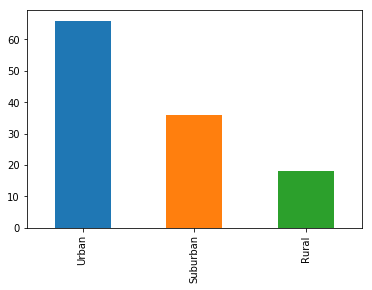

In [17]:
data.Type.value_counts().plot.bar()
plt.show()